In [18]:
import torch
from PMA import PMA_1
from torch.utils.data import Dataset,DataLoader
from myDataset import MyDataset



model = PMA_1()
#加载已经保存的模型
model.load_state_dict(torch.load("/home/user/Programs/PMA_lihang/code_lihang/model/model_1.pth"))


# model.eval()
#加载测试数据
print("start load data")
path = "/home/user/Programs/PMA_lihang/data/缺陷类型需要标注.csv"
dataset = MyDataset(path)
dataloader = DataLoader(dataset,batch_size=64,shuffle=False)
#预测，计算准确率
correct = 0
total = 0
print("start predict")
resoults = []
for i,data in enumerate(dataloader):
    # print("data:",len(data))
    
    inputs,labels = data

    # print("inputs:",inputs)
    # break
    labels = torch.squeeze(labels)
    outputs = model(inputs)
    predict = torch.max(outputs,1)[1]
    resoults.append(predict)
    total += labels.size(0)
    correct += (predict == labels).sum()
    break
print("correct:%d,total:%d,acc:%f"%(correct,total,correct/total))
print("resoults:",resoults)

start load data
加载数据集
数据集加载完成
start predict
correct:0,total:64,acc:0.000000
resoults: [tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12])]


In [2]:
#为什么两个文件重叠的数据没有？
path1 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/root_cause/root_cause_1e-4_4aspects_plus.csv"
path2 = "/home/user/Programs/PMA_lihang/data/data_root_cause_.csv"
path3 = "/home/user/Programs/PMA_lihang/data/pt1_file2_v2.csv"
path4 = "/home/user/Programs/PMA_lihang/data/pt1_file2.csv"
path5 = "/home/user/Programs/PMA_lihang/data/data_4aspects.csv"


import csv

f1 = open(path1,"r")
f2 = open(path2,"r")
f3 = open(path3,"r")
f4 = open(path4,"r")
f5 = open(path5,"r")

reader1 = csv.reader(f1)
reader2 = csv.reader(f2)
reader3 = csv.reader(f3)
reader4 = csv.reader(f4)
reader5 = csv.reader(f5)

set1 = set()
set2 = set()
set3 = set()
set4 = set()

tt = 0
for row in reader5:
    if row[5] != "":
        tt += 1
print("tt:",tt)
kk = 0
for row in reader3:
    if row[5] != "":
        set3.add(row[0])
        kk += 1
print("kk",kk)

for row in reader4:
    if row[-2] != "":
        set4.add(row[0])
j = 0
k = 0
for row in reader1:
    if row[0] in set3:
        j += 1
    if row[0] in set4:
        k += 1
i = 0
m = 0
for row in reader2:
    if row[0] in set3:
        i += 1
    if row[0] in set4:
        k += 1
print("j:",j)
print("k:",k)
print("i:",i)
print("m:",m)

tt: 1748
kk 20879
j: 20886
k: 28117
i: 150
m: 0


In [5]:
#统计旧数据与我们的数据，各个方面的数据在不同类别上的分布。难度的说明

path  = "/home/user/Programs/PMA_lihang/data/data_root_cause_v2.csv"
path_ = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/impact/impact_1e-4_4aspects.csv"

import csv
import seaborn as sns


#定义一个计算标准差的函数，输入是一个列表，输出是标准差
def count_std(data):
    mean = sum(data)/len(data)
    std = 0
    for i in data:
        std += (i - mean)**2
    std = (std/len(data))**0.5
    return std

def count_occupy(path,path_):
    f = open(path,"r")
    reader = csv.reader(f)
    data = []
    for i in range(20):
        data.append(0)
    
    all_num = 0
    for row in reader:
        data[int(row[2])] += 1
        all_num += 1
    print(data)
    f.close()

    f = open(path_,"r")
    reader = csv.reader(f)
    data_ = []
    for i in range(20):
        data_.append(0)
    
    all_num = 0
    for row in reader:
        data_[int(row[2])] += 1
        all_num += 1
    print("*********")
    print(data_)
    f.close()
    return data,data_

#最大最小归一化
def max_min(data):
    max_ = max(data)
    min_ = min(data)
    for i in range(len(data)):
        data[i] = (data[i] - min_)/(max_ - min_)
    return data

data, data_ = count_occupy(path,path_)

data = max_min(data)
data_ = max_min(data_)

std = count_std(data)
std_ = count_std(data_)
      
print("std:",std)
print("std_:",std_)




[614, 982, 2048, 36, 1089, 10, 153, 61, 725, 123, 129, 18706, 0, 0, 0, 0, 0, 0, 0, 0]
*********
[65567, 32506, 22584, 3381, 16541, 1791, 25474, 5065, 3350, 3629, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
std: 0.21608746884938185
std_: 0.24674904576566145


In [12]:
#出现4个方面的前提下统计数据条数
path1 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/att_type/att_type_1e-4_4aspects.csv"
path2 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/impact/impact_1e-4_4aspects.csv"
path3 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/root_cause/root_cause_1e-4_4aspects_plus.csv"
path4 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/v_type/v_type_1e-4_4aspects.csv"
path5 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/vec/vec_1e-4_4aspects.csv"


path1 = "/home/user/Programs/PMA_lihang/data/data_att_type_.csv"
path2 = "/home/user/Programs/PMA_lihang/data/data_root_cause_v2.csv"
path3 = "/home/user/Programs/PMA_lihang/data/data_v_type_.csv"
path4 = "/home/user/Programs/PMA_lihang/data/data_att_vec_.csv"

path1 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/vec/vec_1e-4.csv"
path2 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/v_type/v_type_1e-4.csv"
path3 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/root_cause/root_cause_1e-4.csv"
path4 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/impact/impact_1e-4.csv"
path5 = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/att_type/att_type_1e-4.csv"



import csv

f1 = open(path1,"r")
f2 = open(path2,"r")
f3 = open(path3,"r")
f4 = open(path4,"r")
f5 = open(path5,"r")

reader1 = csv.reader(f1)
reader2 = csv.reader(f2)
reader3 = csv.reader(f3)
reader4 = csv.reader(f4)
reader5 = csv.reader(f5)

count_ = 0

set_ = set()
for row in reader1:
    set_.add(row[0])
count_ += len(set_)
set_ = set()
for row in reader2:
    set_.add(row[0])
count_ += len(set_)
set_ = set()
for row in reader3:
    set_.add(row[0])
count_ += len(set_)
set_ = set()
for row in reader4:
    set_.add(row[0])
count_ += len(set_)
set_ = set()
for row in reader5:
    set_.add(row[0])
count_ += len(set_)
set_ = set()
print(len(set_))
print(count_)






0
501656


In [16]:
#将root_cause中的11类删除

path = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/root_cause/root_cause_1e-4_4aspects_plus.csv"
path_ = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/root_cause/root_cause_1e-4_4aspects_noOther.csv"

import csv

f = open(path,"r")
f_ = open(path_,"w")

reader = csv.reader(f)
writer = csv.writer(f_)

for row in reader:
    if row[2] != "11":
        writer.writerow(row)





In [6]:
import numpy as np

def gini(x):
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g


#v_type
x = np.array([614, 982, 2048, 36, 1089, 10, 153, 61, 725, 123, 129, 18706])
x2 = np.array([65567, 32506, 22584, 3381, 16541, 1791, 25474, 5065, 3350, 3629])
x3 = np.array([100,100,100,100,100,100,100,100,100,100,100,100,100])


print(gini(x))
print(gini(x2))
print(gini(x3))

# x3 = np.array([1479, 688, 1802, 321, 1941, 262, 285, 139, 91, 68, 29, 20, 2172])
# x4 = np.array([953, 605, 550, 249, 164, 238, 95, 91, 62, 40, 16, 18, 2593])


0.8020748905819419
0.5319320910788935
0.0


In [5]:
for i in range(1,7):
    print(i)

1
2
3
4
5
6


In [8]:
#找例子
path = "/home/user/Programs/PMA_lihang/data/pt1_file2_v2.csv"

import csv

f = open(path,"r")
reader = csv.reader(f)

for row in reader:
    if 'CVE-2023-' in row[0]:
        flag = False
        mean = 0
        for i in range(1,7):
            if row[i] == "":
                break
            else:
                mean += 1
        if mean == 6:
            print


CVE-2005-0001
CVE-2005-0003
CVE-2005-0011
CVE-2005-0034
CVE-2005-0035
CVE-2005-0039
CVE-2005-0089
CVE-2005-0091
CVE-2005-0106
CVE-2005-0155
CVE-2005-0156
CVE-2005-0177
CVE-2005-0205
CVE-2005-0224
CVE-2005-0225
CVE-2005-0243
CVE-2005-0255
CVE-2005-0296
CVE-2005-0318
CVE-2005-0331
CVE-2005-0337
CVE-2005-0345
CVE-2005-0359
CVE-2005-0365
CVE-2005-0366
CVE-2005-0399
CVE-2005-0400
CVE-2005-0425
CVE-2005-0429
CVE-2005-0453
CVE-2005-0464
CVE-2005-0465
CVE-2005-0469
CVE-2005-0494
CVE-2005-0511
CVE-2005-0515
CVE-2005-0664
CVE-2005-0775
CVE-2005-0791
CVE-2005-0805
CVE-2005-0811
CVE-2005-0824
CVE-2005-0870
CVE-2005-0871
CVE-2005-0904
CVE-2005-0941
CVE-2005-0958
CVE-2005-0977
CVE-2005-0988
CVE-2005-0991
CVE-2005-1021
CVE-2005-1025
CVE-2005-1038
CVE-2005-1103
CVE-2005-1141
CVE-2005-1142
CVE-2005-1145
CVE-2005-1146
CVE-2005-1159
CVE-2005-1181
CVE-2005-1191
CVE-2005-1192
CVE-2005-1245
CVE-2005-1270
CVE-2005-1307
CVE-2005-1331
CVE-2005-1369
CVE-2005-1372
CVE-2005-1383
CVE-2005-1513
CVE-2005-1514
CVE-20

In [2]:
#统计各个类别的占比
path = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/att_type/att_type_1e-4.csv"
import csv

f = open(path, 'r', encoding='utf-8')

reader = csv.reader(f)
count = []

for i in range(14):
    count.append(0)

for line in reader:
    count[int(line[-1])] += 1

print(count)



[94685, 13229, 3044, 839, 416, 1166, 12535, 0, 0, 0, 0, 0, 0, 0]


In [36]:
#计算列表中各个元素占比

def count_occupy(list):
    all = 0
    for i in list:
        all += i
    re = [i/all for i in list]
    print(re)

list = [238760,206683,129975]

count_occupy(list)



[0.41493314425339495, 0.3591875818969862, 0.2258792738496189]


In [8]:
from typing import List

def gini_coefficient(data: List[int]) -> float:
    data = sorted(data)
    n = len(data)
    numerator = 2 * sum((i + 1) * data[i] for i in range(n))
    denominator = n * sum(data)
    return (numerator / denominator) - (n + 1) / n

data = [9548, 6057, 5396, 2479, 1447, 2518, 1055, 788, 513, 387, 157, 190, 26187]
data2 = [14323, 6853, 18094, 3535, 20158, 2824, 2695, 1308, 820, 553, 323, 184, 21291]
gini = gini_coefficient(data)
print(f"Gini coefficient: {gini:.4f}")
gini = gini_coefficient(data2)
print(f"Gini coefficient: {gini:.4f}")


Gini coefficient: 0.6650
Gini coefficient: 0.5766


In [17]:
data = [9548, 6057, 5396, 2479, 1447, 2518, 1055, 788, 513, 387, 157, 190, 26187]

sorted(data)

[157, 190, 387, 513, 788, 1055, 1447, 2479, 2518, 5396, 6057, 9548, 26187]

In [15]:
import csv

path = "/home/user/Programs/PMA_lihang/data/allitems_v5.csv"
f = open(path,"r",encoding="utf-8")
reader = csv.reader(f)

dic = {}

for line in reader:
    #将一整行数据转换为字符串
    line = ','.join(line)
    # print(line)
    data = line.split("\t##=divide=##\t")
    # print(data[0])
    # print(data[1])
    dic[data[0]] = data[1]
    # print(dic)
    # break
    # break

    


In [30]:
a = [0,1,2,3,4,5,6,7,8,9,10]
#计算列表中各个元素占比
for 

0.905

In [27]:
#挑选一个包含200条数据的子集，对比chatgpt

import csv

# path = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/att_type/att_type_1e-4.csv"
path = "/home/user/Programs/PMA_lihang/mypaper/data/my-results/vec/vec_1e-4.csv"
f = open(path,"r",encoding="utf-8")
reader = csv.reader(f)

#生成1到90600中的200个随机数
import random
random.seed(1)
random_list = random.sample(range(1, 98000), 200)
print(len(random_list))



path_out = "/home/user/Programs/PMA_lihang/data/aaaa_for_gpt.csv"
f_out = open(path_out,"w",encoding="utf-8")
writer = csv.writer(f_out)

# 随机数作为下标，挑选文件中的数据
data_ = []
count = 0
for line in reader:
    if count in random_list:
        data = []
        # print(line)
        data.append(dic[line[0]])
        data.append(line[2])
        # print(data)
        data_.append(data)
        # print(data_)
        
    count += 1
#写入文件
writer.writerows(data_)
    







200


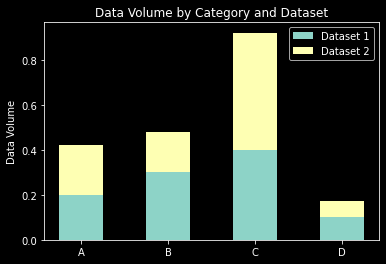

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
categories = ["A", "B", "C", "D"]
dataset1 = [20, 30, 40, 10]
dataset2 = [15, 12, 35, 5]


def confer(data):
    all_num = 0
    for i in data:
        all_num += i
    for i in range(len(data)):
        data[i] = data[i]/all_num
    return data

dataset1 = confer(dataset1)
dataset2 = confer(dataset2)
# Define the width and position of the bars
width = 0.5
x = np.arange(len(categories))

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, dataset1, width, label="Dataset 1")
ax.bar(x, dataset2, width, bottom=dataset1, label="Dataset 2")

# Add some text for labels and title
ax.set_ylabel("Data Volume")
ax.set_title("Data Volume by Category and Dataset")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.show()

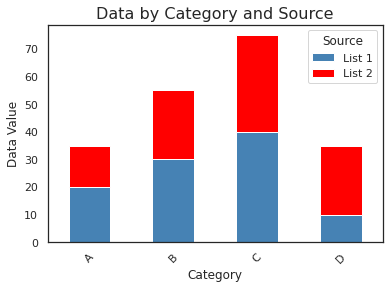

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data lists
list1 = [20, 30, 40, 10]
list2 = [15, 25, 35, 25]
categories = ["A", "B", "C", "D"]

# Combine the data lists into a DataFrame and add a column for source
df = pd.DataFrame({"Category": categories * 2,
                   "Value": list1 + list2,
                   "Source": ["List 1"] * len(list1) + ["List 2"] * len(list2)})

# Pivot the DataFrame to wide format
df_pivot = df.pivot_table(index="Category", columns="Source", values="Value")

# Set seaborn plotting aesthetics
sns.set(style="white")

# Create stacked bar chart using matplotlib plot method
df_pivot.plot(kind="bar", stacked=True, color=["steelblue", "red"])

# Add title and axis labels
plt.title("Data by Category and Source", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Data Value")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [1]:
from gensim.parsing.preprocessing import STOPWORDS 
import numpy 
stop_words = STOPWORDS 
print(type(stop_words))

<class 'frozenset'>


In [4]:
path = "/home/user/Programs/PMA_lihang/data/myData_v_type_eval.csv"
path2 = "/home/user/Programs/PMA_lihang/data/data_v_type_eval.csv"
import csv

f = open(path,'r',encoding='utf-8')
f2= open(path2,'r',encoding='utf-8')
reader = csv.reader(f)
reader2 = csv.reader(f2)

list1 = [0 for i in range(14)]
list2 = [0 for i in range(14)]

ii = 0
for row in reader:
    if ii < 10:
        ii += 1
        print("row1:",row)
        continue
    class_ = int(row[2])
    list1[class_] += 1

ii = 0
for row in reader2:
    if ii < 10:
        ii += 1
        print("row2:",row)
    class_ = int(row[2])
    list2[class_] += 1

print("list1:",list1)
print("list2:",list2)
        

row1: ['CVE-1999-1167', 'Third Voice Web annotation utility remote usersread sensitive data and generate fake web pages for other Third Voice users by injecting malicious Javascript into an annotation.', '0']
row1: ['CVE-2018-0046', 'OpenNMS included with Juniper Networks Junos Space may the stealing of sensitive information or session credentials from Junos Space administrators or perform administrative actions. This issue affects Juniper Networks Junos Space versions prior18.2R1.', '0']
row1: ['CVE-2011-1405', 'Mahara before 1.3.6 remote authenticated usersinject arbitrary web script or HTML via vectors associated with HTML e-mail messages, related to artefact/comment/lib.php and interaction/forum/lib.php.', '0']
row1: ['CVE-2009-1059', 'Trident PowerZip 7.2 might remote attackersexecute arbitrary code via a crafted .zip file.  NOTE: CVE has not investigated whether the specified file.zip file can be used for exploitation of this product.', '2']
row1: ['CVE-2009-2894', 'Ebay Clone 20

In [16]:

#加载模型，进行预测
model = PMA_1()
model.load_state_dict(torch.load("/home/user/Programs/PMA_lihang/code_lihang/model/model_1.pth"))
model.eval()
#加载测试数据
path = "/home/user/Programs/PMA_lihang/data/data_v_type_test.csv"
dataset = MyDataset(path)
dataloader = DataLoader(dataset,batch_size=64,shuffle=True)
#预测，计算准确率
correct = 0
total = 0
print("start predict")
for i,data in enumerate(dataloader):
    inputs,labels = data
    labels = torch.squeeze(labels)
    outputs = model(inputs)
    predict = torch.max(outputs,1)[1]
    print("predict:",predict)
    
    total += labels.size(0)
    correct += (predict == labels).sum()
    break
print("correct:%d,total:%d,acc:%f"%(correct,total,correct/total))

加载数据集
数据集加载完成
start predict
predict: tensor([ 0,  0, 12, 12,  1,  2,  2,  3,  2, 12,  1, 12,  3,  2,  2,  2,  0, 12,
        12,  1,  3, 12, 12,  3, 12,  2, 12, 12, 12,  1,  1, 12, 12, 12, 12,  2,
        12, 12, 12,  1, 12,  1, 12, 12,  0, 12, 12, 12, 12,  0, 12, 12, 12, 12,
         0,  2,  0, 12, 12, 12, 12,  1,  0, 12])
correct:54,total:64,acc:0.843750


In [13]:
import csv
path = "/home/user/Programs/PMA_lihang/data/data_v_type_test.csv"
#打开文件
f = open(path,'r')
#读取文件
reader = csv.reader(f)
intem12 = 0
items = 0
for row in reader:
    if row[2] == "12":
        intem12 += 1
    items += 1
print("intem12:",intem12)
print("items:",items)

intem12: 2585
items: 5672


In [11]:
from PMA import PMA_1
import torch
from torch.utils.data import Dataset,DataLoader
from myDataset import MyDataset

#加载模型，进行预测，计算f1值

model = PMA_1()
model.load_state_dict(torch.load("/home/user/Programs/PMA_lihang/code_lihang/model/model_1.pth"))
model.eval()
#加载测试数据
path = "/home/user/Programs/PMA_lihang/data/data_v_type_test.csv"
dataset = MyDataset(path)
dataloader = DataLoader(dataset,batch_size=64,shuffle=True)
#预测，
correct = 0
total = 0
print("start predict")
resoults = []
#总共13类。计算每一类的精确率和召回率
#每一类的预测正确的个数
corrects = [0 for i in range(13)]
#每一类的预测错误的个数
errors = [0 for i in range(13)]
#每一类的实际正确的个数
labels = [0 for i in range(13)]
for i,data in enumerate(dataloader):
    inputs,labels_ = data
    labels_ = torch.squeeze(labels_)
    outputs = model(inputs)
    predict = torch.max(outputs,1)[1]
    resoults.append(predict)
    total += labels_.size(0)
    correct += (predict == labels_).sum()
    #计算每一类的预测正确的个数
    for i in range(len(predict)):
        if predict[i] == labels_[i]:
            corrects[predict[i]] += 1
        else:
            errors[predict[i]] += 1
    #计算每一类的个数
    for i in range(len(labels_)):
        labels[labels_[i]] += 1
    # break
print("correct:%d,total:%d,acc:%f"%(correct,total,correct/total))
# print("resoults:",resoults)
print("corrects:",corrects)
print("errors:",errors)
print("labels:",labels)
#计算每一类的精确率和召回率
for i in range(len(corrects)):
    if corrects[i] == 0:
        precision = 0
    else:
        precision = corrects[i]/(corrects[i]+errors[i])
    if labels[i] == 0:
        recall = 0
    else:
        recall = corrects[i]/labels[i]
    print("第%d类的精确率为%f,召回率为%f"%(i,precision,recall))
#计算f1值，只计算精确率和召回率都不为0的类
f1 = 0
count = 0
for i in range(len(corrects)):
    if corrects[i] == 0:
        precision = 0
    else:
        count += 1
        precision = corrects[i]/(corrects[i]+errors[i])
    if labels[i] == 0:
        recall = 0
    else:
        recall = corrects[i]/labels[i]
    if precision == 0 or recall == 0:
        continue
    f1 += 2*precision*recall/(precision+recall)
f1 = f1/count
print("f1:",f1)






加载数据集
数据集加载完成
start predict
correct:4729,total:5672,acc:0.833745
corrects: [920, 591, 356, 203, 0, 178, 0, 0, 0, 0, 0, 0, 2481]
errors: [13, 5, 118, 26, 0, 20, 0, 0, 0, 0, 0, 0, 761]
labels: [963, 613, 552, 263, 146, 240, 125, 71, 44, 32, 21, 17, 2585]
第0类的精确率为0.986066,召回率为0.955348
第1类的精确率为0.991611,召回率为0.964111
第2类的精确率为0.751055,召回率为0.644928
第3类的精确率为0.886463,召回率为0.771863
第4类的精确率为0.000000,召回率为0.000000
第5类的精确率为0.898990,召回率为0.741667
第6类的精确率为0.000000,召回率为0.000000
第7类的精确率为0.000000,召回率为0.000000
第8类的精确率为0.000000,召回率为0.000000
第9类的精确率为0.000000,召回率为0.000000
第10类的精确率为0.000000,召回率为0.000000
第11类的精确率为0.000000,召回率为0.000000
第12类的精确率为0.765268,召回率为0.959768
f1: 0.855271749799685


In [15]:
from PMA import PMA_4
import torch
from torch.utils.data import Dataset,DataLoader
from myDataset import MyDataset

#加载模型，进行预测，计算f1值

model = PMA_4()
model.load_state_dict(torch.load("/home/user/Programs/PMA_lihang/code_lihang/model/model_4.pth"))
model.eval()
#加载测试数据
path = "/home/user/Programs/PMA_lihang/data/data_root_cause_test.csv"
dataset = MyDataset(path)
dataloader = DataLoader(dataset,batch_size=64,shuffle=True)
#预测，
correct = 0
total = 0
print("start predict")
resoults = []
#总共13类。计算每一类的精确率和召回率
#每一类的预测正确的个数
class_num = 11
corrects = [0 for i in range(class_num)]
#每一类的预测错误的个数
errors = [0 for i in range(class_num)]
#每一类的实际正确的个数
labels = [0 for i in range(class_num)]
for i,data in enumerate(dataloader):
    inputs,labels_ = data
    labels_ = torch.squeeze(labels_)
    outputs = model(inputs)
    predict = torch.max(outputs,1)[1]
    resoults.append(predict)
    total += labels_.size(0)
    correct += (predict == labels_).sum()
    #计算每一类的预测正确的个数
    for i in range(len(predict)):
        if predict[i] == labels_[i]:
            corrects[predict[i]] += 1
        else:
            errors[predict[i]] += 1
    #计算每一类的个数
    for i in range(len(labels_)):
        labels[labels_[i]] += 1
    # break
print("correct:%d,total:%d,acc:%f"%(correct,total,correct/total))
# print("resoults:",resoults)
print("corrects:",corrects)
print("errors:",errors)
print("labels:",labels)
#计算每一类的精确率和召回率
for i in range(len(corrects)):
    if corrects[i] == 0:
        precision = 0
    else:
        precision = corrects[i]/(corrects[i]+errors[i])
    if labels[i] == 0:
        recall = 0
    else:
        recall = corrects[i]/labels[i]
    print("第%d类的精确率为%f,召回率为%f"%(i,precision,recall))
#计算f1值，只计算精确率和召回率都不为0的类
f1 = 0
count = 0
for i in range(len(corrects)):
    if corrects[i] == 0:
        precision = 0
    else:
        count += 1
        precision = corrects[i]/(corrects[i]+errors[i])
    if labels[i] == 0:
        recall = 0
    else:
        recall = corrects[i]/labels[i]
    if precision == 0 or recall == 0:
        continue
    f1 += 2*precision*recall/(precision+recall)
f1 = f1/count
print("f1:",f1)






加载数据集
数据集加载完成
start predict
correct:1895,total:2696,acc:0.702893
corrects: [1425, 279, 130, 61, 0, 0, 0, 0, 0, 0, 0]
errors: [531, 117, 103, 50, 0, 0, 0, 0, 0, 0, 0]
labels: [1521, 325, 404, 344, 78, 1, 12, 0, 6, 5, 0]
第0类的精确率为0.728528,召回率为0.936884
第1类的精确率为0.704545,召回率为0.858462
第2类的精确率为0.557940,召回率为0.321782
第3类的精确率为0.549550,召回率为0.177326
第4类的精确率为0.000000,召回率为0.000000
第5类的精确率为0.000000,召回率为0.000000
第6类的精确率为0.000000,召回率为0.000000
第7类的精确率为0.000000,召回率为0.000000
第8类的精确率为0.000000,召回率为0.000000
第9类的精确率为0.000000,召回率为0.000000
第10类的精确率为0.000000,召回率为0.000000
f1: 0.5674730921519306


ImportError: cannot import name 'PMA_11kernel' from 'PMA' (/home/user/Programs/PMA_lihang/code_lihang/model/PMA.py)